# Simulating Solar Generation Data using Renewables.Ninja

This Python script generates three Monte Carlo solar energy scenarios for the AMO Group Project based on solar generation data from Renewables.ninja for the Klim wind farm region in Western Denmark.
The scenarios are designed to align with previously generated wind scenarios:

1. **Stormy scenario**: High wind, low solar.
2. **Blue-sky scenario**: High solar, low wind.
3. **Cloudy scenario**: Moderate wind, low-to-moderate solar.

Each scenario includes average solar generation values per time slot stored deterministically for optimization.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

solar_data = pd.read_csv('energy_data/ninja_pv_57.1098_9.1595_corrected.csv', skiprows=8, header=None)
solar_generation = solar_data.iloc[:, -1].values
num_steps = len(solar_generation)
time_index = np.arange(0, num_steps)  # Time in hours

# Display the first few rows of the dataset
print(solar_data.head())


                  0                 1     2
0  2019-01-01 04:00  2019-01-01 05:00  0.00
1  2019-01-01 05:00  2019-01-01 06:00  0.00
2  2019-01-01 06:00  2019-01-01 07:00  0.00
3  2019-01-01 07:00  2019-01-01 08:00  0.00
4  2019-01-01 08:00  2019-01-01 09:00  0.01


In [18]:
# Set a fixed random seed for reproducibility
np.random.seed(42)

# Dictionary to store generated scenarios
scenarios = {}

# Function to create a Monte Carlo scenario by applying Gaussian noise to the base solar data
def create_scenario(base, scenario_type):
    # Define noise scaling factors for each scenario type
    noise_dict = {'stormy': (0.5, 0.1), 'blue_sky': (1.2, 0.1), 'cloudy': (0.7, 0.1)}
    scale, stddev = noise_dict.get(scenario_type, (1.0, 0.0))  # Default is no scaling if not found
    return base * np.random.normal(scale, stddev, len(base))  # Apply random variation

# Generate and store scenarios for stormy, blue-sky, and cloudy conditions
for scenario_type in ['stormy', 'blue_sky', 'cloudy']:
    scenarios[scenario_type] = create_scenario(solar_generation, scenario_type)

# Create a DataFrame to store scenario results
scenario_df = pd.DataFrame({'time': time_index})  # Assign time index to first column
for scenario_type, values in scenarios.items():
    scenario_df[scenario_type] = values  # Store each scenario's values in separate columns


In [ ]:
# Save the scenario data to CSV
scenario_df.to_csv('energy_data/solar_scenarios.csv', index=False)
print("Solar scenarios saved to 'energy_data/solar_scenarios.csv'")


Index(['2019-01-01 04:00', '2019-01-01 05:00', '0'], dtype='object')

In [19]:
solar_data.columns

Index([0, 1, 2], dtype='int64')

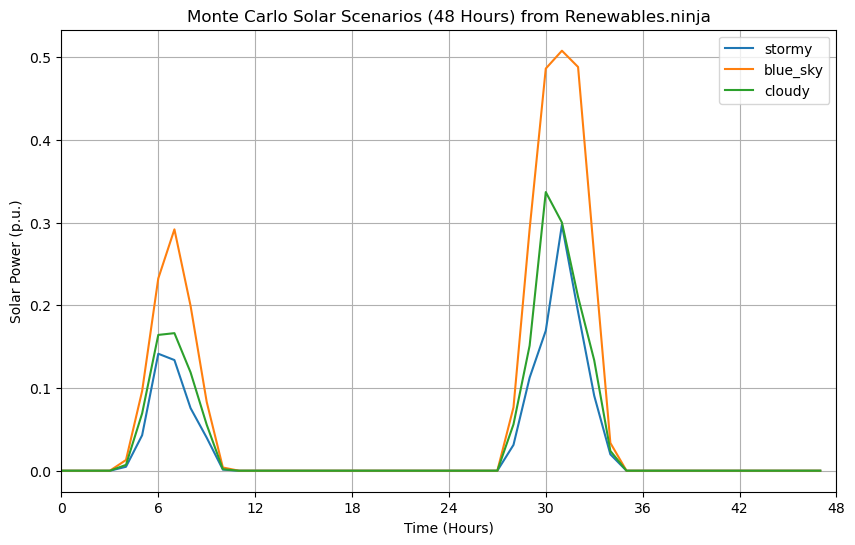

In [20]:
# Plot the first 48 hours of the generated scenarios
plt.figure(figsize=(10, 6))
for scenario_type, values in scenarios.items():
    plt.plot(time_index[:48], values[:48], label=scenario_type)  # Limit to 48-hour window

# Format the x-axis to display clear hourly increments
plt.xticks(np.arange(0, 49, step=6))  # Set tick marks every 6 hours
plt.xlim([0, 48])  # Restrict x-axis range to 48 hours
plt.xlabel('Time (Hours)')  # Label the x-axis
plt.ylabel('Solar Power (p.u.)')  # Label the y-axis
plt.title('Monte Carlo Solar Scenarios (48 Hours) from Renewables.ninja')  # Add plot title
plt.legend()  # Show legend for scenario types
plt.grid(True)  # Enable grid for better readability
plt.show()  # Display the plot